In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import os
df = pd.read_csv('../dados/articles_limpo.csv')

A base de dados possui os seguintes atributos: title, text, date, category, subcategory, link.

In [2]:
# Verificando quais atributos existem na base de dados.
df.columns

Index(['title', 'text', 'date', 'category', 'link'], dtype='object')

In [3]:
#df[df['category'] == 'paineldoleitor']
cats = set(df['category'])
print("Quantidade de categorias: ", len(cats))
print(cats)

Quantidade de categorias:  43
{'cenarios-2017', 'equilibrioesaude', 'saopaulo', 'especial', 'guia-de-livros-filmes-discos', 'ilustrissima', 'bbc', 'cotidiano', 'sobretudo', 'asmais', 'mulher', 'colunas', 'poder', 'turismo', 'topofmind', 'ombudsman', 'seminariosfolha', 'ambiente', 'empreendedorsocial', 'infograficos', 'dw', 'educacao', 'multimidia', 'euronews', 'banco-de-dados', 'guia-de-livros-discos-filmes', 'mercado', 'tec', 'ilustrada', 'mundo', 'tv', 'comida', 'serafina', 'o-melhor-de-sao-paulo', 'treinamento', 'opiniao', 'paineldoleitor', 'treinamentocienciaesaude', 'esporte', 'folhinha', 'rfi', 'bichos', 'vice'}


Verificando a quantidade de categorias de documentos presentes na base (48) percebemos que a base de dados tem o seu volume de categorias desbalanceado. Algumas categorias tem mais de 20 mil instâncias enquanto outras tem próximo a um documento.

<IPython.core.display.Javascript object>


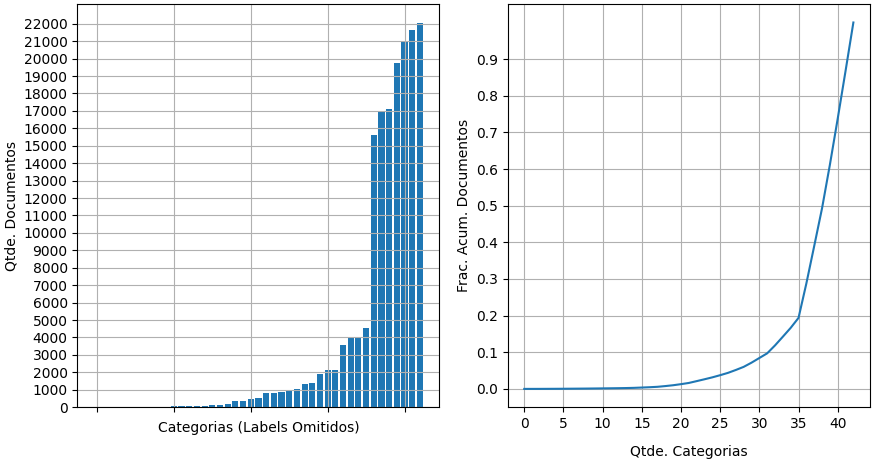

In [10]:
# Categorias presents na base de dados e suas respectivas contabilizações.
import collections
import numpy as np
distrib = collections.Counter(df['category'])

xaxis = list()
yaxis = list()
total = 0
for obj in sorted(distrib.items(), key = lambda pos: pos[1]):
    xaxis.append(obj[0])
    yaxis.append(obj[1])
    total += obj[1]

fig, (ax, cdf) = plt.subplots(1, 2, constrained_layout=True)
ax.set_ylabel("Qtde. Documentos")
ax.set_xlabel("Categorias (Labels Omitidos)", labelpad=10)
#ax.set_xticks(range(0, len(yaxis), 5))
ax.set_yticks(np.arange(0, yaxis[-1], 1000))
#ax.axes.get_xaxis().set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.grid()
ax.bar(range(0,len(yaxis)), yaxis)

# Plotando a CDF.
acc = 0
cdf_yaxis = list()
yaxis.sort()
for v in yaxis:
    acc += float(v)/total
    cdf_yaxis.append(acc)

cdf.set_ylabel("Frac. Acum. Documentos")
cdf.set_xlabel("Qtde. Categorias", labelpad=10)
cdf.set_xticks(range(0, len(cdf_yaxis), 5))
cdf.set_yticks(np.arange(0, 1, 0.1))
cdf.grid()
cdf.plot(range(0,len(cdf_yaxis)), cdf_yaxis)
    
plt.savefig('../graficos/distribuicao_categorias.pdf')


Verificando quais categorias são as mais presentes e ausentes na base verificamos que: (1) 4 categorias somam mais de 80 mil documentos da base e estão relacionadas a mercado, poder, colunas e esporte.

<IPython.core.display.Javascript object>


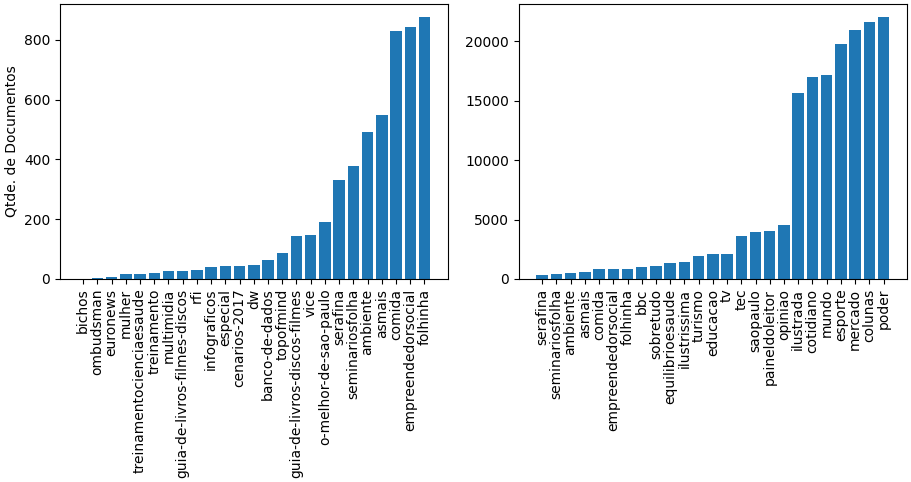

<ipython-input-11-24f8af718500>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  grade[0].set_xticklabels(xaxis[:25], rotation=90)
<ipython-input-11-24f8af718500>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  grade[1].set_xticklabels(xaxis[-25:], rotation=90)


In [11]:
fig, grade = plt.subplots(1, 2, constrained_layout=True)

grade[0].set_xticklabels(xaxis[:25], rotation=90)
grade[0].set_ylabel("Qtde. de Documentos")
grade[0].bar(xaxis[:25],yaxis[:25])
grade[1].set_xticklabels(xaxis[-25:], rotation=90)
grade[1].bar(xaxis[-25:],yaxis[-25:])
fig.savefig('../graficos/ranking_clategorias.pdf')

Analisamos a distribuição dos documentos publicados em cada mês da base de dados e percebemos que a base está ligeiramente balanceada, porém com uma tendência a diminuir os números de documentos para os meses finais, próximos a setembro de 2017. Nenhum dos meses apresentou menos de 3000 documentos.

<IPython.core.display.Javascript object>


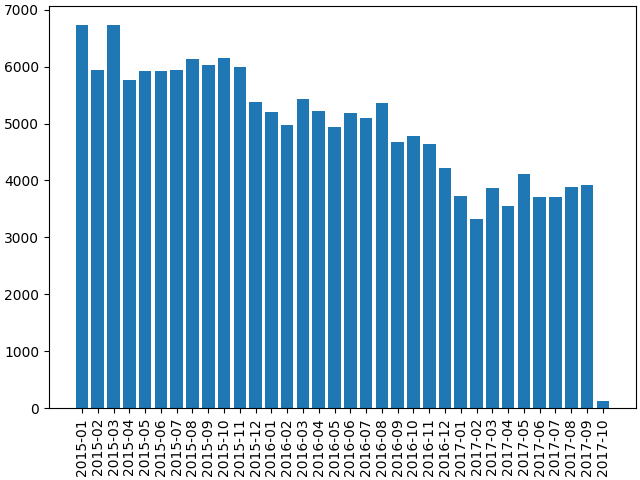

<ipython-input-12-d3d825b937fe>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xaxis, rotation=90)


In [12]:
datas_por_mes = list()
for d in df['date']:
    dtp = d[:7]
    datas_por_mes.append(dtp)

xaxis = list()
yaxis = list()
datas_freq = collections.Counter(datas_por_mes)
for obj in sorted(datas_freq.items(), key = lambda pos: pos[0]):
    xaxis.append(obj[0])
    yaxis.append(obj[1])
    
fig, ax = plt.subplots(constrained_layout=True)

ax.set_xticklabels(xaxis, rotation=90)
ax.bar(xaxis, yaxis)
fig.savefig('../graficos/distribuicao_docs_por_mes.pdf')
    

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import os
df = pd.read_csv('../dados/classificados.csv')

<IPython.core.display.Javascript object>


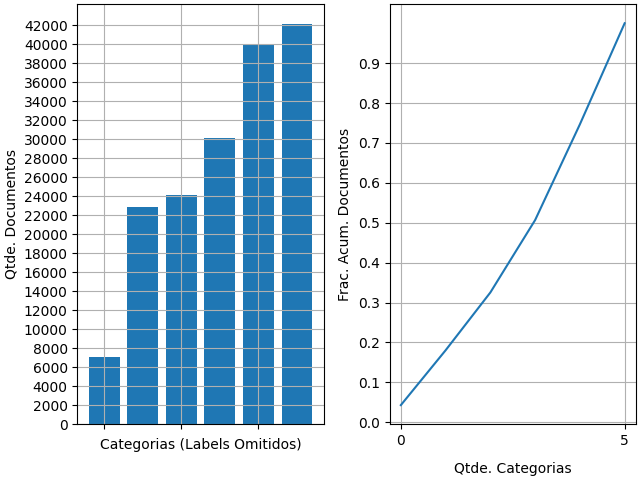

In [8]:
# Categorias presents na base de dados e suas respectivas contabilizações.
import collections
import numpy as np
distrib = collections.Counter(df['classe'])

xaxis = list()
yaxis = list()
total = 0
for obj in sorted(distrib.items(), key = lambda pos: pos[1]):
    xaxis.append(obj[0])
    yaxis.append(obj[1])
    total += obj[1]

fig, (ax, cdf) = plt.subplots(1, 2, constrained_layout=True)
ax.set_ylabel("Qtde. Documentos")
ax.set_xlabel("Categorias (Labels Omitidos)", labelpad=10)
#ax.set_xticks(range(0, len(yaxis), 5))
ax.set_yticks(np.arange(0, yaxis[-1], 2000))
#ax.axes.get_xaxis().set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.grid()
ax.bar(range(0,len(yaxis)), yaxis)

# Plotando a CDF.
acc = 0
cdf_yaxis = list()
yaxis.sort()
for v in yaxis:
    acc += float(v)/total
    cdf_yaxis.append(acc)

cdf.set_ylabel("Frac. Acum. Documentos")
cdf.set_xlabel("Qtde. Categorias", labelpad=10)
cdf.set_xticks(range(0, len(cdf_yaxis), 5))
cdf.set_yticks(np.arange(0, 1, 0.1))
cdf.grid()
cdf.plot(range(0,len(cdf_yaxis)), cdf_yaxis)
    
plt.savefig('../graficos/distribuicao_categorias_classif.pdf')


<IPython.core.display.Javascript object>


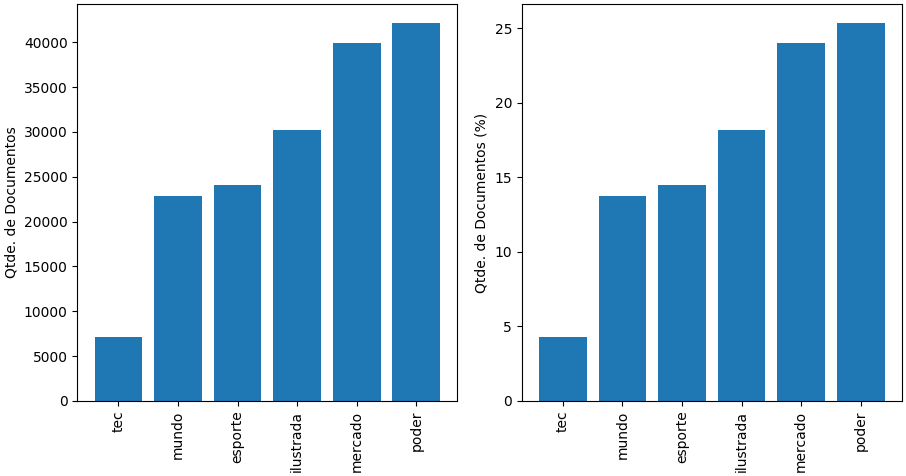

<ipython-input-9-a58bb6831c64>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  grade[0].set_xticklabels(xaxis, rotation=90)
<ipython-input-9-a58bb6831c64>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  grade[1].set_xticklabels(xaxis[-25:], rotation=90)


In [9]:
fig, grade = plt.subplots(1, 2, constrained_layout=True)

grade[0].set_xticklabels(xaxis, rotation=90)
grade[0].set_ylabel("Qtde. de Documentos")
grade[0].bar(xaxis,yaxis)
grade[1].set_xticklabels(xaxis[-25:], rotation=90)
grade[1].set_ylabel("Qtde. de Documentos (%)")
total = 0
for i in yaxis:
    total += i
percentes = [ 100*(float(i)/total) for i in yaxis ]
grade[1].bar(xaxis,percentes)
fig.savefig('../graficos/ranking_clategorias.pdf')